In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_gray = plt.imread(r'albert-einstein_gray.jpg')
img_binary = plt.imread(r'j.png')

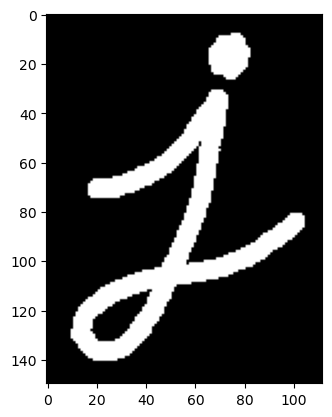

In [5]:
plt.imshow(img_binary)

In [6]:
np.unique(img_binary)

array([0., 1.], dtype=float32)

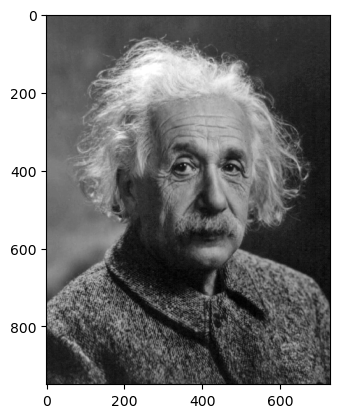

In [7]:
plt.imshow(img_gray,cmap='gray')

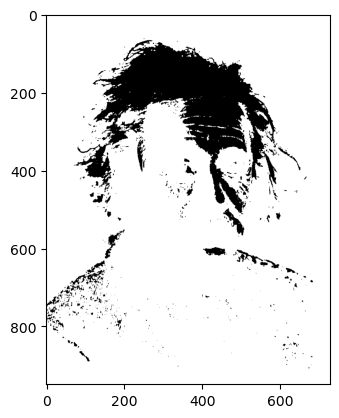

In [8]:
th = 150
im2 = img_gray>th
plt.imshow(~(im2),cmap='gray')

In [9]:
np.unique(im2)

array([False,  True])

In [10]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

In [11]:
type(K_r)

numpy.ndarray

In [12]:
K_r.dtype

dtype('uint8')

In [13]:
K_r

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [14]:
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

In [15]:
K_e

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [16]:
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

In [17]:
K_c

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [19]:
E_r = cv2.erode(img_binary,K_r)
E_e = cv2.erode(img_binary,K_e)
E_c = cv2.erode(img_binary,K_c)

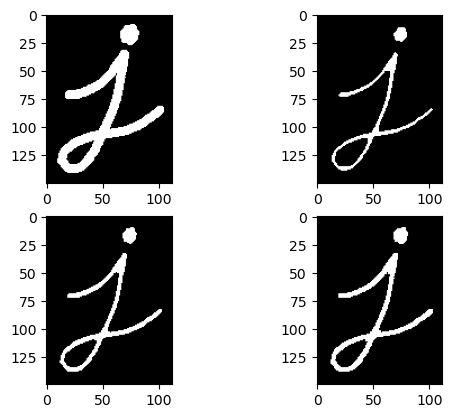

In [20]:
plt.subplot(221)
plt.imshow(img_binary)
plt.subplot(222)
plt.imshow(E_r)
plt.subplot(223)
plt.imshow(E_e)
plt.subplot(224)
plt.imshow(E_c)
plt.show()


In [33]:
print(np.sum((E_r - E_e)**2))

936.0


In [34]:
print(np.sum((E_r - E_c)**2))

1446.0


In [35]:
print(np.sum((E_c - E_e)**2))

510.0


In [38]:
D_r = cv2.dilate(img_binary,K_r)
D_e = cv2.dilate(img_binary,K_e)
D_c = cv2.dilate(img_binary,K_c)

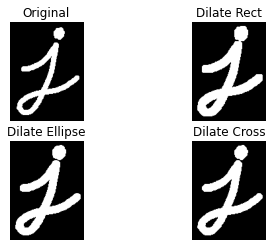

In [39]:
plt.subplot(221)
plt.imshow(img_binary)
plt.title("Original")
plt.axis('off')
plt.subplot(222)
plt.imshow(D_r)
plt.title("Dilate Rect")
plt.axis('off')
plt.subplot(223)
plt.imshow(D_e)
plt.title("Dilate Ellipse")
plt.axis('off')
plt.subplot(224)
plt.imshow(D_c)
plt.title("Dilate Cross")
plt.axis('off')
plt.show()

In [60]:
img_binary.dtype

dtype('float32')

In [61]:
im_bool = np.array(img_binary[:,:,0],dtype=np.bool)

In [62]:
im_bool.dtype

dtype('bool')

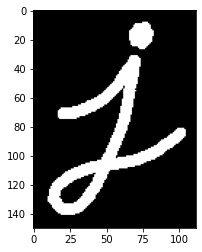

In [63]:
plt.imshow(im_bool,cmap='gray')

In [66]:
N = np.random.rand(im_bool.shape[0],im_bool.shape[1])

In [71]:
N_binary = N>0.98

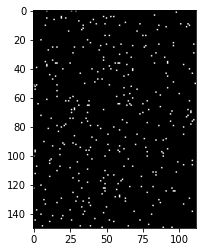

In [72]:
plt.imshow(N_binary,cmap='gray')

In [73]:
img_N = im_bool | N_binary

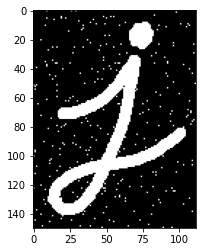

In [74]:
plt.imshow(img_N,cmap='gray')

In [75]:
O_r = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN,K_r)

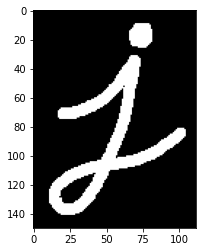

In [76]:
plt.imshow(O_r,cmap='gray')

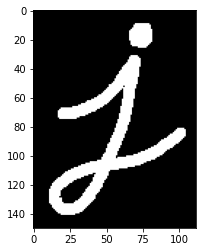

In [77]:
E_r = cv2.erode(np.float32(img_N),K_r)
O_r2 = cv2.dilate(E_r,K_r)
plt.imshow(O_r2,cmap='gray')

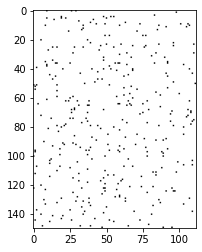

In [84]:
N_binary = N<0.98
plt.imshow(N_binary,cmap='gray')

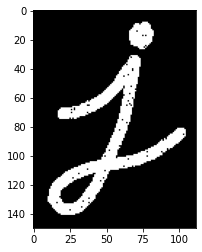

In [85]:
img_H = im_bool & N_binary
plt.imshow(img_H,cmap='gray')

In [86]:
C_r = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,K_r)

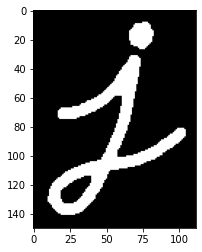

In [87]:
plt.imshow(C_r,cmap='gray')

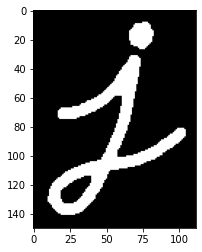

In [88]:
D_r = cv2.dilate(np.float32(img_H),K_r)
C_r2 = cv2.erode(D_r,K_r)
plt.imshow(C_r2,cmap='gray')

In [89]:
G_r = cv2.morphologyEx(C_r,cv2.MORPH_GRADIENT,K_r)

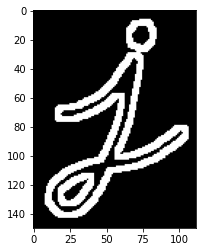

In [90]:
plt.imshow(G_r,cmap='gray')

In [100]:
TH_c = cv2.morphologyEx(E_r,cv2.MORPH_TOPHAT,K_c)

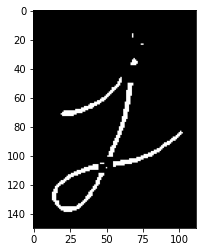

In [101]:
plt.imshow(TH_r,cmap='gray')

In [105]:
BH_c = cv2.morphologyEx(D_r,cv2.MORPH_BLACKHAT,K_c)

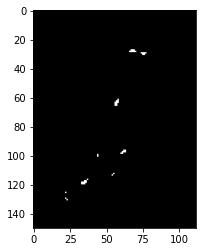

In [106]:
plt.imshow(BH_c,cmap='gray')